## Exploración de series de tiempo de la evolución de distintas criptomonedas

Es preciso mencionar que mi conocimiento sobre las criptomonedas en estas instancias es basicamente nulo, sin embargo, creo que esto me puede dar una perspectiva objetiva en el análisis de los resultados que se obtengan. Mi plan es hacer una investigación posterior, la cual contraste los análisis hechos en esta exploración con el panorama real de las criptomonedas. 

En el curso se han visto distintas técnicas, y sería realmente complicado abordar todas ellas. 

Aquí he seleccionado algunas que me parece podrían aportar información que nos permita dilucidar la relación que existe entre las distintas criptomonedas. 

## 0.- Apertura de datos

In [79]:
from binance.client import Client
from enum import Enum
import matplotlib.pyplot as plt
import numpy as np

In [85]:
class CoinType(str,Enum):
    BITCOIN = "BTC"
    ETHEREUM = "ETH"
    BNB = "BNB"
    CARDANO = "ADA"
    DOGECOIN = "DOGE"
    RIPPLE = "XRP"
    POLKADOT = "DOT"
    LITECOIN = "LTC"
    SOLANA = "SOL"
    BITCOIN_CASH = "BCH"
    CHAINLINK = "LINK"
    POLYGON = "MATIC"
    THETA = "THETA"
    STELLAR = "XLM"
    VECHAIN = "VET"
    ETHER_CLASSIC = "ETC"
    FILECOIN = "FIL"
    TRON = "TRX"
        
class CryptoInfoRetriever:
    #Las fechas deben estar en formato estandar UTC "YYYY-MM-DD"
    def __init__(self, initialDate, finalDate):
        self.apiKey = "HbrskJyT2YwAbKqSKO6lwe9QO1pZzza4pB5eyDpaWFwkRSts6QNXQZ1gROgCzmgw"
        self.secretKey = "Y1K1BnyPRvtDnHq3shDALkl2SMwlhZu2ZxG6rdJmOo82ZPvSh5kT5amWbW7hCoMS"
        
        #Inicializamos el cliente
        self.interval = "1h"
        self.client = Client(self.apiKey, self.secretKey)
        self.initialDate = initialDate
        self.finalDate = finalDate
    
    #Ya esta, ahora podemos acceder a las series de tiempo que necesitemos
    
    def retrieveMonthlyData(self, coinType):
        d = self.client.get_historical_klines(coinType.value+"USDT", self.interval,self.initialDate, self.finalDate, limit = 500)
        n = len(d)
        #El precio de la criptomoneda está en la segunda posición
        prices = []
        for i in range(0,n):
            ohlcv = d[i]
            prices.append(ohlcv[1])
        prices = [float(x) for x in prices]
        return np.arange(0,n, 1), prices
    
    
    def getAllCoinSeriesDictionary(self):
        seriesDictionary = {}
        for coin in CoinType:
            tArr, timeSeries = self.retrieveMonthlyData(coin)
            seriesDictionary[coin] = timeSeries
        
        return tArr, seriesDictionary
        
    
    

Text(0, 0.5, 'Precio (USDT)')

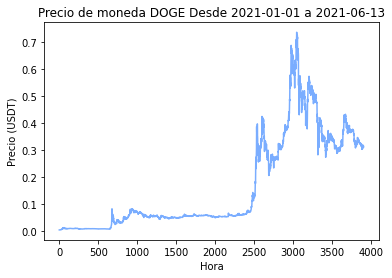

In [86]:
#Prueba funcionamiento de la apertura de datos
cType = CoinType.DOGECOIN
cryptoRetriever = CryptoInfoRetriever("2021-01-01", "2021-06-13")
hoursArray, resultingTimeSeries = cryptoRetriever.retrieveMonthlyData(cType)

plt.figure()
plt.plot(hoursArray, resultingTimeSeries, color = "#7aadff")
plt.title("Precio de moneda "+cType.value + " Desde "+cryptoRetriever.initialDate+ " a "+cryptoRetriever.finalDate)
plt.xlabel("Hora")
plt.ylabel("Precio (USDT)")


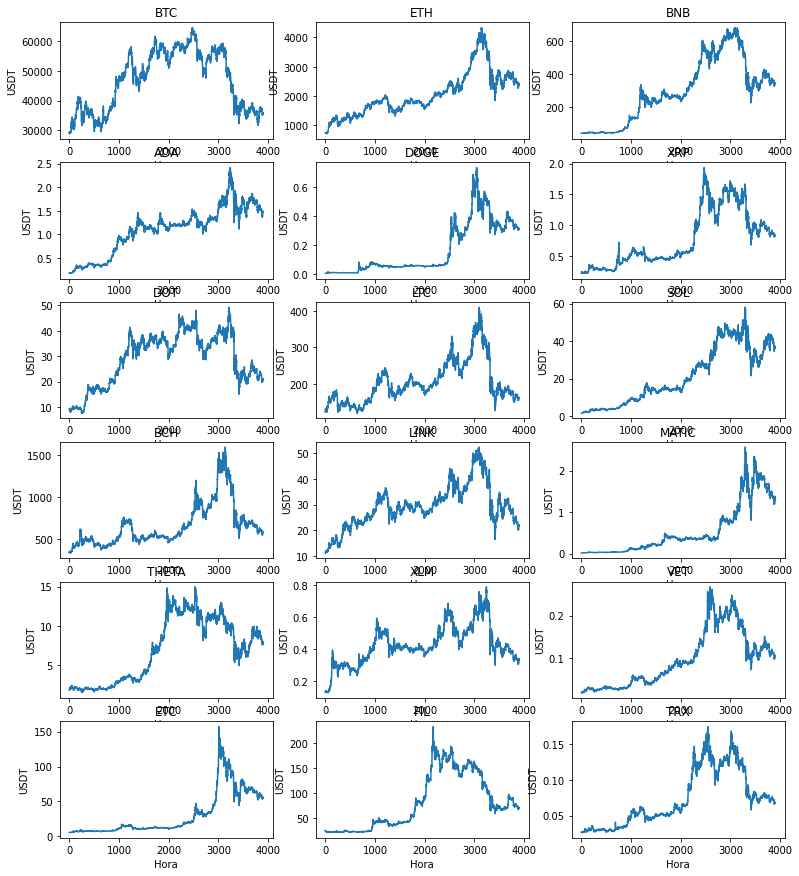

In [87]:
#Visualicemos todas las series de tiempo
tArr, seriesDictionary = cryptoRetriever.getAllCoinSeriesDictionary()
n = len(CoinType)
rows = int(np.floor(n/3))
if(rows % 3 >0):
    rows = rows + 1 
fig, ax = plt.subplots(rows, 3, figsize = (13, 15))
counter = 0
for coin in CoinType:
    row = int(counter/3)
    col = counter%3
    ax[row, col].plot(tArr, seriesDictionary[coin])
    ax[row, col].set_title(coin.value)
    ax[row, col].set_xlabel("Hora")
    ax[row, col].set_ylabel("USDT")
    counter = counter + 1

In [51]:
np.arange(,0,5)

array([], dtype=int32)